## **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **load dataset**

In [2]:
##### load dataset ####
D = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
print(D)
print(D.shape)

[[1.6   1.12  0.16  0.   ]
 [1.6   1.6   1.6   1.   ]
 [0.4   1.52  1.44  1.   ]
 [0.16  1.52  1.36  1.   ]
 [1.39  0.    0.16  0.   ]
 [1.31  0.32  0.224 0.   ]
 [1.28  0.32  0.32  0.   ]
 [0.    1.36  1.6   1.   ]
 [1.6   0.    0.    0.   ]
 [0.272 1.6   1.28  1.   ]
 [1.44  0.16  0.16  0.   ]
 [1.36  0.32  0.32  0.   ]
 [0.32  1.44  1.28  1.   ]
 [0.48  1.44  1.44  1.   ]
 [0.    1.6   1.6   1.   ]
 [0.16  1.36  1.44  1.   ]
 [1.47  0.24  0.16  0.   ]
 [1.6   0.208 0.32  0.   ]]
(18, 4)


## **set prototype**

In [3]:
#### set prototype ####
P = D[:2, :3]
y_p = D[:2, 3]
X = D[2:, :3]
y_x = D[2:, 3]
print(P)
print(X)

[[1.6  1.12 0.16]
 [1.6  1.6  1.6 ]]
[[0.4   1.52  1.44 ]
 [0.16  1.52  1.36 ]
 [1.39  0.    0.16 ]
 [1.31  0.32  0.224]
 [1.28  0.32  0.32 ]
 [0.    1.36  1.6  ]
 [1.6   0.    0.   ]
 [0.272 1.6   1.28 ]
 [1.44  0.16  0.16 ]
 [1.36  0.32  0.32 ]
 [0.32  1.44  1.28 ]
 [0.48  1.44  1.44 ]
 [0.    1.6   1.6  ]
 [0.16  1.36  1.44 ]
 [1.47  0.24  0.16 ]
 [1.6   0.208 0.32 ]]


## **show Plot data in 3D befor train**

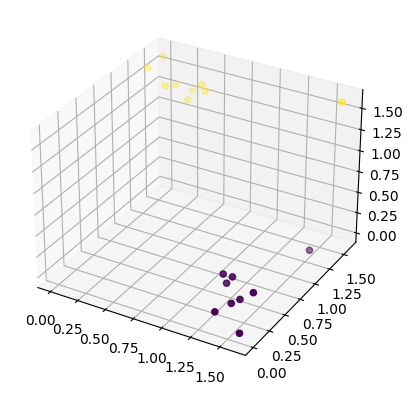

In [4]:
##### Plot Samples in 3D #####
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(D[:, 0], D[:, 1], D[:, 2], c=D[:, 3])

## **LVQ1 Model Implementation From Scratch**

In [5]:
##### Implement your LVQ1 model here#####

class LVQ:

  def __init__(self, epochs, alpha, W):
    self.epochs = epochs
    self.alpha = alpha
    
    self.W = W
  
  def winner_label(self, x):
    dis0 = np.linalg.norm(x-self.W[0, :])
    dis1 = np.linalg.norm(x-self.W[1, :])
    
    return 0 if dis0 > dis1 else 1
  
    
  def update(self, x, label_winner, label_actual):
    delta = self.alpha * (x - self.W[label_winner, :])
    if label_actual == label_winner:
      self.W[label_winner, :] += delta
    else:
      self.W[label_winner, :] -= delta
        
  def train(self, X, y):
    
    for epoch in range(self.epochs):
      print(f'epoch: {epoch}'.center(40, '-'))
      for i in range(X.shape[0]):
        x = X[i,:]
        label_winner = self.winner_label(x)
        print(f'X[{i}] = {x} => Actual({int(y[i])}) vs Winner({label_winner})')
        self.update(x, label_winner, int(y[i]))

## **Train Model**

In [6]:
##### Implement your LVQ1 model here#####
lvq = LVQ(epochs=10, alpha=0.05, W=P.copy())
lvq.train(X, y_x)

----------------epoch: 0----------------
X[0] = [0.4  1.52 1.44] => Actual(1) vs Winner(0)
X[1] = [0.16 1.52 1.36] => Actual(1) vs Winner(0)
X[2] = [1.39 0.   0.16] => Actual(0) vs Winner(1)
X[3] = [1.31  0.32  0.224] => Actual(0) vs Winner(1)
X[4] = [1.28 0.32 0.32] => Actual(0) vs Winner(1)
X[5] = [0.   1.36 1.6 ] => Actual(1) vs Winner(0)
X[6] = [1.6 0.  0. ] => Actual(0) vs Winner(1)
X[7] = [0.272 1.6   1.28 ] => Actual(1) vs Winner(0)
X[8] = [1.44 0.16 0.16] => Actual(0) vs Winner(1)
X[9] = [1.36 0.32 0.32] => Actual(0) vs Winner(1)
X[10] = [0.32 1.44 1.28] => Actual(1) vs Winner(0)
X[11] = [0.48 1.44 1.44] => Actual(1) vs Winner(0)
X[12] = [0.  1.6 1.6] => Actual(1) vs Winner(0)
X[13] = [0.16 1.36 1.44] => Actual(1) vs Winner(0)
X[14] = [1.47 0.24 0.16] => Actual(0) vs Winner(1)
X[15] = [1.6   0.208 0.32 ] => Actual(0) vs Winner(1)
----------------epoch: 1----------------
X[0] = [0.4  1.52 1.44] => Actual(1) vs Winner(0)
X[1] = [0.16 1.52 1.36] => Actual(1) vs Winner(0)
X[2] = [1

## **show plot data in 3D after train**

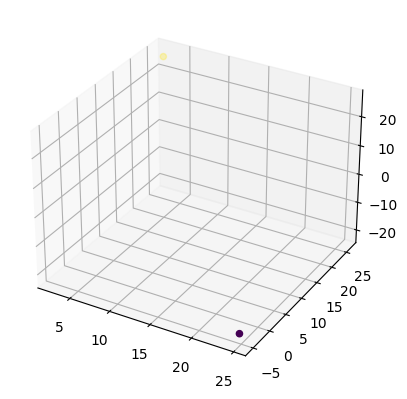

In [7]:
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
W = lvq.W
ax.scatter(W[:, 0], W[:, 1], W[:, 2], c=[0,1])

## **Test Model**

In [8]:
##### Test The Model With The Given Sample #####

test_sample = np.array([[0.304, 1.488, 1.408]])

test_prediction = lvq.winner_label(test_sample)
print(f'{test_sample} => {test_prediction}')

[[0.304 1.488 1.408]] => 1


In [9]:
lvq.W[0]

array([ 24.76741384,  -4.97882627, -21.21916498])